In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import smtplib
from email.mime.text import MIMEText
from cryptography.fernet import Fernet
import csv


In [15]:
# Sample DataFrame to simulate your data
data = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'customer_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'transaction_amount': [100, 200, 150, 300, 250]
})

# Display the data
data


,customer_id,customer_name,transaction_amount
0,1,Alice,100
1,2,Bob,200
2,3,Charlie,150
3,4,David,300
4,5,Eve,250


In [16]:
# Classify columns based on names
def classify_data(column_name):
    if "customer" in column_name.lower():
        return "Customer Data"
    elif "transaction" in column_name.lower():
        return "Transaction Data"
    else:
        return "Other Data"

# Classify the columns
data_classification = {col: classify_data(col) for col in data.columns}
data_classification


{'customer_id': 'Customer Data',
 'customer_name': 'Customer Data',
 'transaction_amount': 'Transaction Data'}

In [17]:
# Simulate Data Lineage
data_lineage = {
    "customer_data": ["transaction_data"]
}

data_lineage


{'customer_data': ['transaction_data']}

In [18]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Duplicates:", duplicates)


Missing Values: customer_id           0
customer_name         0
transaction_amount    0
dtype: int64
Duplicates: 0


In [19]:
# Send email alert if there are issues
def send_alert(issue):
    msg = MIMEText(f"Data Quality Issue: {issue}")
    msg['Subject'] = 'Data Quality Alert'
    msg['From'] = 'your_email@example.com'
    msg['To'] = 'stakeholder_email@example.com'

    with smtplib.SMTP('smtp.example.com') as server:
        server.sendmail(msg['From'], msg['To'], msg.as_string())

# Example: Alert if there are missing values
if missing_values.any():
    send_alert("Missing data detected in critical columns.")


In [20]:
# Generate encryption key
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Encrypt data
sensitive_data = "Sensitive customer information"
encrypted_data = cipher_suite.encrypt(sensitive_data.encode())

# Print encrypted data
print(f"Encrypted Data: {encrypted_data}")

# Decrypt the data
decrypted_data = cipher_suite.decrypt(encrypted_data).decode()
print(f"Decrypted Data: {decrypted_data}")


Encrypted Data: b'gAAAAABndO4HG3JRYwz3BOTsRnayysyfHHrhw7pimHDfe6zp6q3vKopS3IpzaeqdYpzgBynPwIoSyWeFqemEcW9Te2FpNMxw1AUch5c5E3jnjA4F-5ZhO6w='
Decrypted Data: Sensitive customer information


In [21]:
# Example metadata for data elements
metadata = {
    "customer_id": {"type": "int", "description": "Unique customer identifier", "owner": "Data Steward 1"},
    "customer_name": {"type": "str", "description": "Customer full name", "owner": "Data Steward 2"},
}

# Save metadata to CSV
def save_metadata_to_csv(metadata, filename="metadata.csv"):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Data Element", "Type", "Description", "Owner"])
        for element, details in metadata.items():
            writer.writerow([element, details["type"], details["description"], details["owner"]])

# Call function to save
save_metadata_to_csv(metadata)


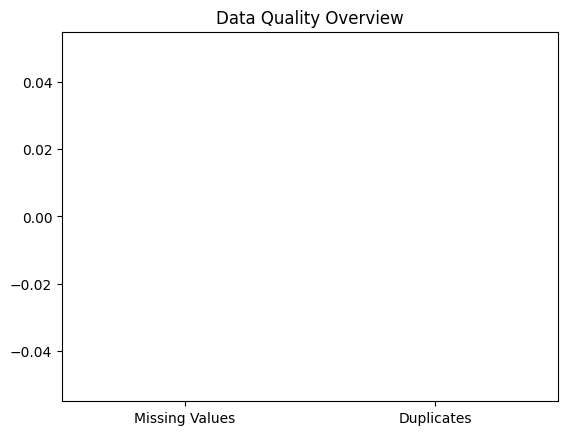

In [22]:
# Example: Data Quality Overview
quality_metrics = {
    "Missing Values": missing_values.sum(),
    "Duplicates": duplicates,
}

# Plot the data quality metrics
plt.bar(quality_metrics.keys(), quality_metrics.values())
plt.title("Data Quality Overview")
plt.show()


In [23]:
# Simulate audit by checking key metrics
def audit_data(data):
    missing_values = data.isnull().sum()
    print("Audit: Missing Values Summary")
    print(missing_values)

# Run the audit
audit_data(data)


Audit: Missing Values Summary
customer_id           0
customer_name         0
transaction_amount    0
dtype: int64


In [13]:
from google.colab import files
uploaded = files.upload()

# Load the data into pandas DataFrame
data = pd.read_csv(next(iter(uploaded)))


Saving PATIENTS.csv to PATIENTS.csv
